In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

# Add another pair of Conv2D and MaxPooling2D for more model depth,
# followed by the flatten and multiple dense layers

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)             

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from matplotlib import pyplot
from keras.datasets import cifar10


In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


170498071/170498071 [==============================] - 2s 0us/step


In [7]:
Cnn_model = models.Sequential()

Cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
Cnn_model.add(layers.MaxPooling2D((2, 2)))

Cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
Cnn_model.add(layers.MaxPooling2D((2, 2)))

Cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
Cnn_model.add(layers.MaxPooling2D((2, 2)))

Cnn_model.add(layers.Flatten())

Cnn_model.add(layers.Dense(128, activation='relu'))
Cnn_model.add(layers.Dense(10, activation='softmax'))


In [8]:
Cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = Cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 38s 117ms/step - loss: 1.7122 - accuracy: 0.3706 - val_loss: 1.4795 - val_accuracy: 0.4562
Epoch 2/10
313/313 [==============================] - 36s 116ms/step - loss: 1.3317 - accuracy: 0.5228 - val_loss: 1.2438 - val_accuracy: 0.5631
Epoch 3/10
313/313 [==============================] - 36s 116ms/step - loss: 1.1586 - accuracy: 0.5943 - val_loss: 1.1442 - val_accuracy: 0.5965
Epoch 4/10
313/313 [==============================] - 36s 116ms/step - loss: 1.0455 - accuracy: 0.6349 - val_loss: 1.0536 - val_accuracy: 0.6349
Epoch 5/10
313/313 [==============================] - 36s 116ms/step - loss: 0.9695 - accuracy: 0.6609 - val_loss: 1.0466 - val_accuracy: 0.6433
Epoch 6/10
313/313 [==============================] - 36s 116ms/step - loss: 0.9071 - accuracy: 0.6834 - val_loss: 0.9950 - val_accuracy: 0.6617
Epoch 7/10
313/313 [==============================] - 36s 116ms/step - loss: 0.8384 - accuracy: 0.7087 - val_loss: 0.9351 - val_ac

In [10]:
test_loss, test_accuracy = Cnn_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


313/313 [==============================] - 3s 9ms/step - loss: 0.8980 - accuracy: 0.6947
Test accuracy: 0.6947000026702881


In [15]:
import matplotlib.pyplot as plt

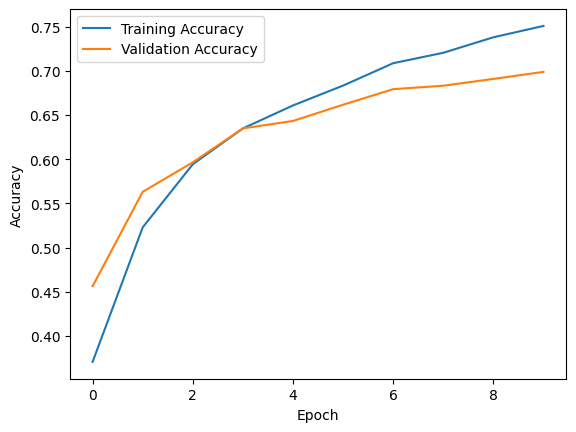

In [17]:
# Plot the test accuracy during training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()